# Procesamiento

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Function to create DataFrames
def create_df(path: str, name: str):
    return pd.read_csv(path + name, index_col=0)

In [7]:
# Creating DataFrames
deaths_2021 = create_df(path, 'deaths_2021.csv')
deaths_2020 = create_df(path, 'deaths_2020.csv')
positives_2021 = create_df(path, 'positives_2021.csv')
positives_2020 = create_df(path, 'positives_2020.csv')
vaccines = create_df(path, 'vaccines.csv')

In [8]:
print(deaths_2020.sample(2))

     provincia  poblacion  total  acumuladas       lat        lng  created_at
2485    Manabí    1562079     74        2532 -1.056181 -80.455217  13/04/2020
1787      Loja     521154      4         487 -3.983333 -79.200000  15/03/2020


In [9]:
print(positives_2020.sample(2))

             provincia  poblacion  total  nuevas       lat        lng  \
3335  Zamora Chinchipe     120416    912       7 -4.120000 -78.800000   
6489            Guayas    4387434  25639     179 -2.183333 -79.883333   

      created_at  
3335  29/07/2020  
6489  08/12/2020  


In [10]:
print(vaccines.sample(2))

          fecha  dosis_total  primera_dosis  segunda_dosis  refuerzo
167  30/09/2021     20896804       10978191        9918613         0
151  08/09/2021     20225580       10699102        9526478         0


Los DataFrames de 2021 tienen la misma estructura que los de 2020, así que se analizan los 3 de distinta estructura para realizar su limpieza.

### Tipos de datos correctos y no nulos

In [11]:
# Mejor usa .info() desde antes
print(deaths_2020.info(), positives_2020.info(), vaccines.info(), sep='\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8783
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   provincia   8784 non-null   object 
 1   poblacion   8784 non-null   int64  
 2   total       8784 non-null   int64  
 3   acumuladas  8784 non-null   int64  
 4   lat         8784 non-null   float64
 5   lng         8784 non-null   float64
 6   created_at  8784 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 549.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7055
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   provincia   7056 non-null   object 
 1   poblacion   7056 non-null   int64  
 2   total       7056 non-null   int64  
 3   nuevas      7056 non-null   int64  
 4   lat         7056 non-null   float64
 5   lng         7056 non-null   float64
 6   created_at  7056 non-n

No hay datos nulos. Se debe cambiar el tipo `object` por `datetime`:

In [12]:
deaths_2021['created_at'] = pd.to_datetime(deaths_2021['created_at'])
deaths_2020['created_at'] = pd.to_datetime(deaths_2020['created_at'])
positives_2021['created_at'] = pd.to_datetime(positives_2021['created_at'])
positives_2020['created_at'] = pd.to_datetime(positives_2020['created_at'])
vaccines['fecha'] = pd.to_datetime(vaccines['fecha'])

### Concatenar datasets

Se concatena los datasets de deaths y positives para facilitar el análisis.

In [13]:
deaths = pd.concat([deaths_2020, deaths_2021])
positives = pd.concat([positives_2020, positives_2021])

### Datos homogéneos

Encontrar posibles errores (números fuera de lo común o negativos) y seleccionar las columnas de datos que se van a necesitar.

In [14]:
print(deaths.isnull().any(), positives.isnull().any(), vaccines.isnull().any(), sep='\n')

provincia     False
poblacion     False
total         False
acumuladas    False
lat           False
lng           False
created_at    False
dtype: bool
provincia     False
poblacion     False
total         False
nuevas        False
lat           False
lng           False
created_at    False
dtype: bool
fecha            False
dosis_total      False
primera_dosis    False
segunda_dosis    False
refuerzo         False
dtype: bool


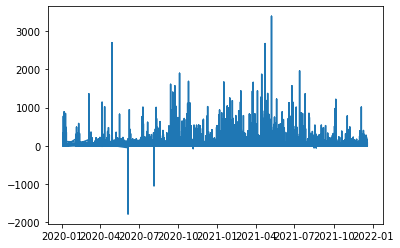

In [15]:
plt.plot(positives.created_at, positives.nuevas)
plt.show()

In [16]:
to_replace = positives.query('nuevas < 0')['nuevas'].values
replaced = to_replace * (-1)
positives['nuevas'].replace(to_replace, replaced, inplace=True)

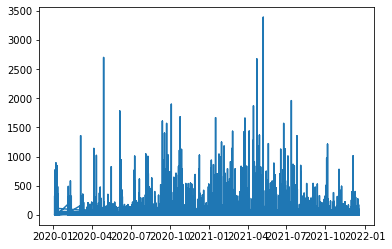

In [17]:
plt.plot(positives.created_at, positives.nuevas)
plt.show()

In [18]:
deaths_2021.dtypes

provincia             object
poblacion              int64
total                  int64
acumuladas             int64
lat                  float64
lng                  float64
created_at    datetime64[ns]
dtype: object

### Exportar data procesada

Idea: crea una columna de año y otra de mes

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e7b048df-fc9b-4970-aa88-df153b270a6f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>